Exploratory Data Analysis TITANIC

Part 1: Exploratory data analysis EDA
    1. Characteristics analysis
    2. To find any correlation or trend, consider multiple characteristics.
    
Part 2: Feature engineering and data cleaning. 
    1. Add some features.
    2. Delete redundant functions.
    3. Convert features into forms suitable for modeling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('train_titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Objectiv variable: Survived
#Check the quantity of null values in DataFrame
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Quantity of survivors')

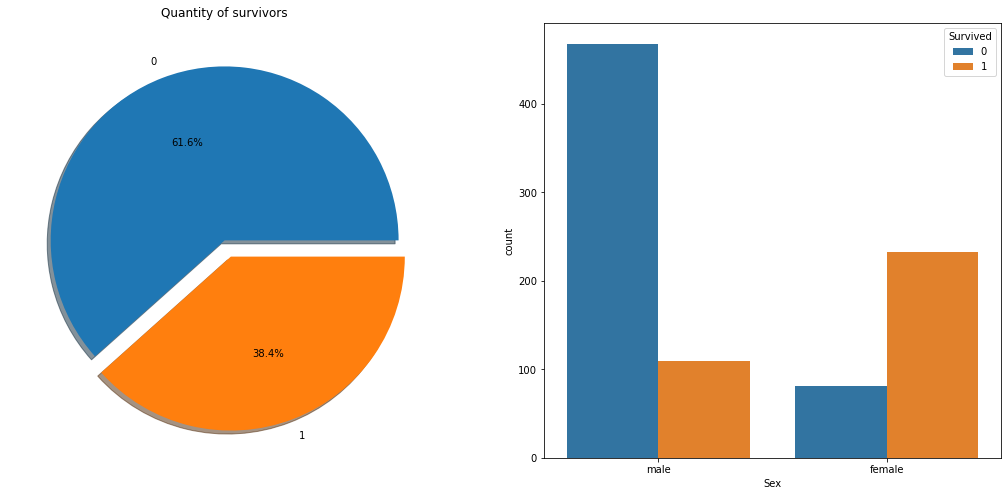

In [4]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Survived'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0], explode = [0, 0.1], shadow = True)
ax[0].set_title('Survivors')
ax[0].set_ylabel('')

sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
ax[0].set_title('Quantity of survivors')

Analyzing categorical variables: Sex

In [5]:
data['PassengerId'].count()
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
data.groupby(['Sex', 'Survived']) ['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

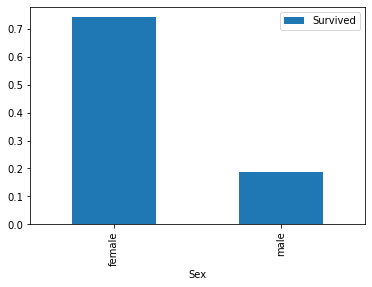

In [7]:
#Average of male an female survivors
data[ ['Sex', 'Survived'] ].groupby(['Sex']).mean().plot.bar()
plt.show

Analyzing ordinal variables PClass

In [8]:
pd.crosstab( data['Pclass'], data['Survived'], margins = True ).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 0, 'Class')

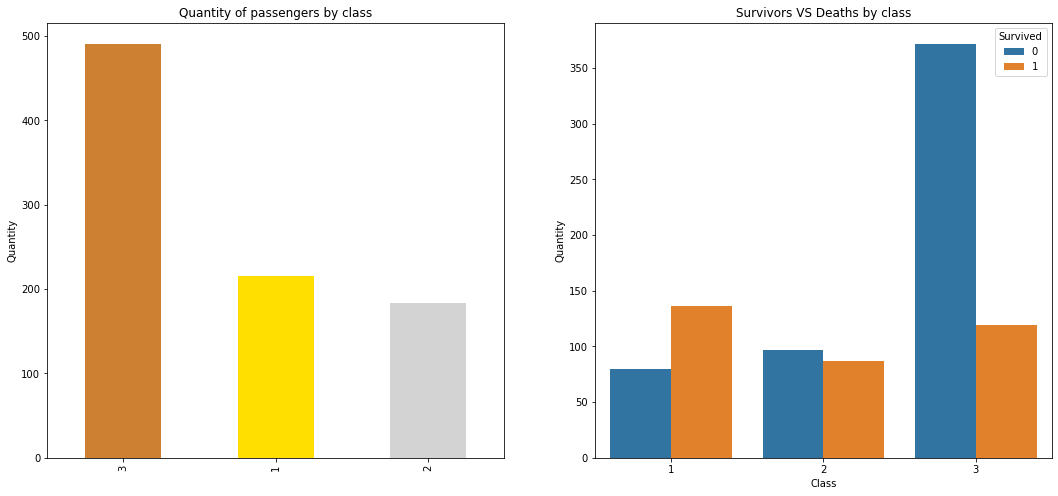

In [9]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Pclass'].value_counts().plot.bar(ax = ax[0], color = ['#CD7F32', '#FFDF00', '#D3D3D3'])
ax[0].set_title('Quantity of passengers by class')
ax[0].set_ylabel('Quantity')

sns.countplot('Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Survivors VS Deaths by class')
ax[1].set_ylabel('Quantity')
ax[1].set_xlabel('Class')

# Analyzing survival rate by sex and class

In [10]:
pd.crosstab([ data['Sex'], data['Survived']], data['Pclass'], margins = True).style.background_gradient(cmap = 'summer_r')

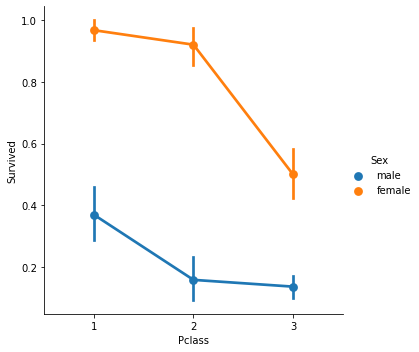

In [11]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data)
plt.show()

## Analyzing fare (Coutinuous variable)

In [12]:
print('The most expensive fare: ', data['Fare'].max())
print('The most cheap fare: ', data['Fare'].min())

The most expensive fare:  512.3292
The most cheap fare:  0.0


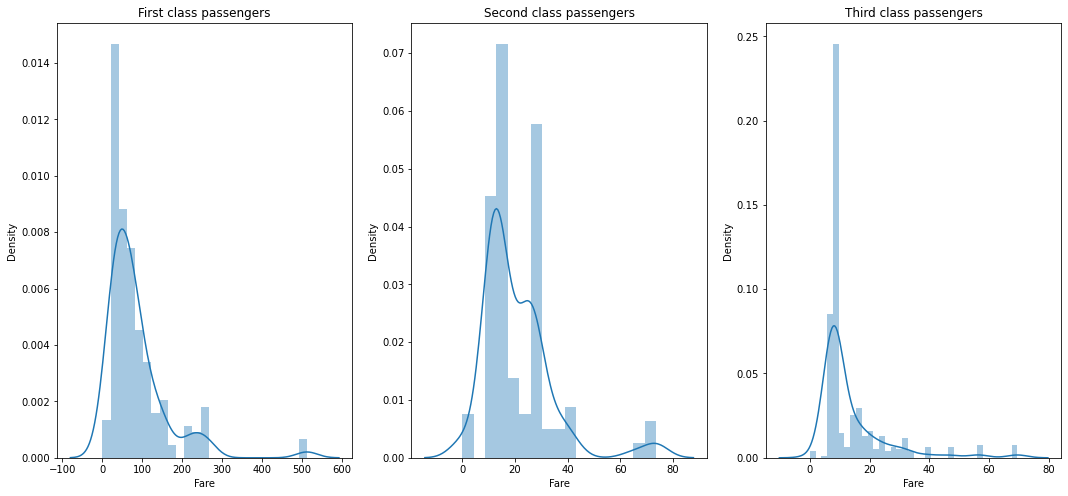

In [13]:
f, ax = plt.subplots(1, 3, figsize = (18, 8))
sns.distplot( data [data[ 'Pclass'] == 1] ['Fare'], ax = ax[0])
ax[0].set_title('First class passengers')

sns.distplot( data [data[ 'Pclass'] == 2] ['Fare'], ax = ax[1])
ax[1].set_title('Second class passengers')

sns.distplot( data [data[ 'Pclass'] == 3] ['Fare'], ax = ax[2])
ax[2].set_title('Third class passengers')

plt.show()

## Data cleaning
Steps:
1. Convert some continuous varables into ranges.
2. Convert some string variables into numeric variables.
3. Delete ndedless features.
4. Correct null values. 

In [14]:
#Binning o Normalization
data['age_range'] = 0
data.loc[data['Age'] <= 16, 'age_range'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32),'age_range'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48),'age_range'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64),'age_range'] = 3
data.loc[data['Age'] > 64, 'age_range'] = 4

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [16]:
#Check the number of passengers in each range
data['age_range'].value_counts().to_frame().style.background_gradient(cmap = 'summer_r')

,age_range
1,346
0,277
2,188
3,69
4,11


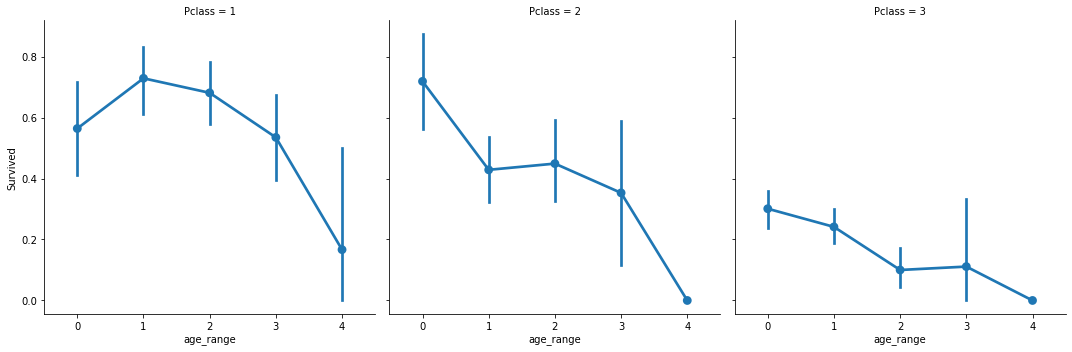

In [17]:
sns.factorplot('age_range', 'Survived', data = data, col = 'Pclass')

In [18]:
#The survivor rate decreases while the age is lower, in all the classes

**Problems whit the fare features**

In [19]:
data['fare_range'] = pd.qcut(data['Fare'], 4)

In [20]:
data.groupby(['fare_range'])['Survived'].mean().to_frame().style.background_gradient(cmap = 'summer_r')

,Survived
fare_range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [21]:
data['fare_category'] = 0
data.loc[data['Fare'] <= 7.91, 'fare_category'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'fare_category'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31.0), 'fare_category'] = 2
data.loc[(data['Fare'] > 31.0) & (data['Fare'] <= 512.329), 'fare_category'] = 3

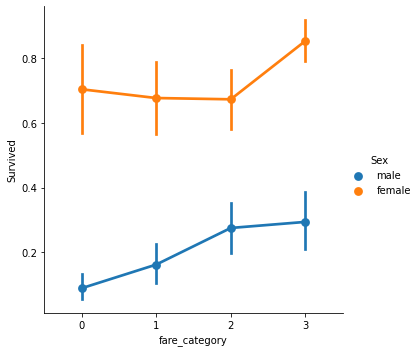

In [22]:
sns.factorplot('fare_category', 'Survived', data = data, hue = 'Sex')

## Data cleaning: Convert strings into numeric values

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_range,fare_range,fare_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,"(7.91, 14.454]",1


In [24]:
#Valores como sexo y la puerta de embarque aportan mucho al modelo, son strings, así que es necesario convertirlos
data['Sex'].replace(['male', 'female'], [0, 1], inplace = True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace = True)

In [25]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_range,fare_range,fare_category
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,2,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,2,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,2,"(7.91, 14.454]",1


## Delete needless features


1. PassengerId: Can't classificate
2. Name: Can't convert it into a categoric value
3. Age: We already have a age_range column
4. Ticket: Is an aleatory string that we can't to clasificate
5. Fare: We already have a function fare_category
6. Cabin: Lots of NaN values
7. fare_range: We create 

In [26]:
data.drop(['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'fare_range'], axis = 1, inplace = True)

In [27]:
data.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,age_range,fare_category
0,0,3,0,1,0,0.0,1,0
1,1,1,1,1,0,1.0,2,3
2,1,3,1,0,0,0.0,1,1


Management of null values
We can delete it, do anything or replace it

In [28]:
data.isnull().sum()

Survived         0
Pclass           0
Sex              0
SibSp            0
Parch            0
Embarked         2
age_range        0
fare_category    0
dtype: int64

In [29]:
data[data['Embarked'].isnull()]

,Survived,Pclass,Sex,SibSp,Parch,Embarked,age_range,fare_category
61,1,1,1,0,0,NaN,2,3
829,1,1,1,0,0,NaN,3,3


Text(0.5, 1.0, 'Number of passenger who boarded')

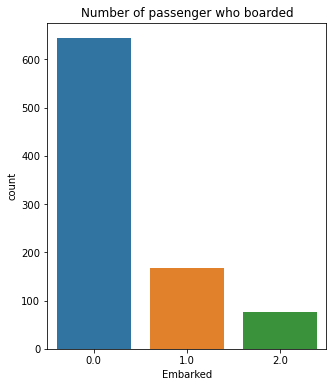

In [30]:
f, ax = plt.subplots(1, 1, figsize = (5, 6))

sns.countplot('Embarked', data = data, ax = ax)
ax.set_title('Number of passenger who boarded')

In [31]:
data['Embarked'].fillna(0, inplace = True)

In [32]:
data.isnull().sum()

Survived         0
Pclass           0
Sex              0
SibSp            0
Parch            0
Embarked         0
age_range        0
fare_category    0
dtype: int64

In [33]:
#To export to a csv file
data.to_csv("Cleaning_titanic.csv")